we pass arrays of indices in place of single scalars.
This allows us to very quickly access and modify complicated subsets of an array’s values.


In [1]:
import numpy as np
rand=np.random.RandomState(42)
x=rand.randint(100,size=10)
x

array([51, 92, 14, 71, 60, 20, 82, 86, 74, 74])

In [2]:
[x[3],x[7],x[2]]

[71, 86, 14]

In [3]:
ind=[3,7,2]
x[ind]

array([71, 86, 14])

In [4]:
ind=np.array([[3,7],
              [4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

## Fancy indexing working in multiple dimensions

In [5]:
x=np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [6]:
row=np.array([0,1,2])
col=np.array([2,1,3])
x[row,col]

array([ 2,  5, 11])

In [7]:
print(x[0,2])
print(x[1,1])
print(x[2,3])

2
5
11


In [11]:
row[:,np.newaxis] ,col # multiply 0->2,1,3 : 1->2,1,3 :2->2,1,3

(array([[0],
        [1],
        [2]]), array([2, 1, 3]))

In [13]:
x[row[:,np.newaxis],col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [16]:
row[:,np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## combined indexing

In [18]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [20]:
#position (2,2) ,(2,0) ,(2,1)
x[2,[2,0,1]]

array([10,  8,  9])

In [21]:
mask=np.array([1,0,1,0],dtype=bool)
mask

array([ True, False,  True, False])

In [22]:
x[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

# Selecting random points

In [26]:
mean=[0,0]
cov=[[1,2],
     [2,5]]

x=rand.multivariate_normal(mean,cov,100)
x.shape

(100, 2)

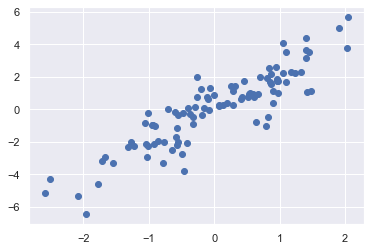

In [28]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
plt.scatter(x[:,0],x[:,1])

In [29]:
indices=np.random.choice(x.shape[0],20,replace =False)
indices

array([54, 78,  6, 51, 91, 65, 53, 17, 33, 89, 14, 21, 22,  8, 15, 96, 83,
       28, 26, 82])

In [32]:
selection =x[indices]
selection.shape

(20, 2)

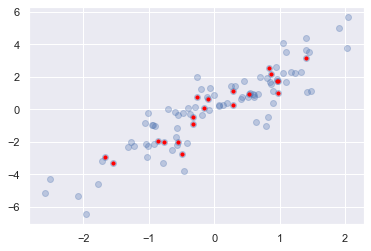

In [40]:
plt.scatter(x[:,0],x[:,1],alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],facecolor='red',s=10)

# Modifying values with fancy indexing

In [43]:
x=np.arange(10)
i=np.array([2,1,8,4])
x[i]=99
x

array([ 0, 99, 99,  3, 99,  5,  6,  7, 99,  9])

In [45]:
x=np.zeros(10)
x[[0,0]]=[4,6]
x


array([6., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [46]:
#where 4 goes in [4,6]

In [47]:
i=[2,3,3,4,4,4]
x[i] +=1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

## Binding Data

In [51]:
np.random.seed(42)
x=np.random.randint(100)
x

51

In [53]:
bins=np.linspace(-5,5,20)
counts=np.zeros_like(bins)
counts

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [55]:
i =np.searchsorted(bins,x)
i

20

In [56]:
np.add.at(counts,i,1)

IndexError: index 20 is out of bounds for axis 0 with size 20

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  """Entry point for launching an IPython kernel.


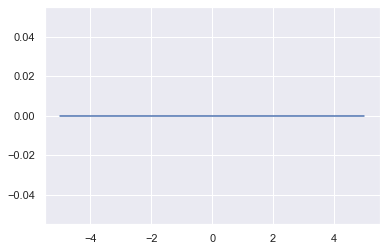

In [57]:
plt.plot(bins,counts,linestyle='steps')

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 <a list of 1 Patch objects>)

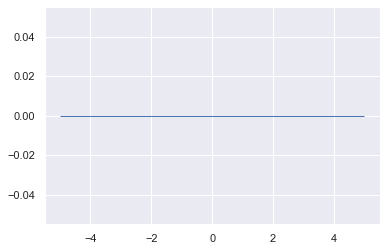

In [58]:
plt.hist(x,bins,histtype='step')